In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D, Dense
import os
import cv2
import tensorflow as tf


In [1]:
from tensorflow.keras.models import Sequential

In [5]:
mnist = tf.keras.datasets.mnist

In [8]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [21]:
Y_train = Y_train.reshape(len(Y_train), 1)
Y_test = Y_test.reshape(len(Y_test), 1)
X_train.shape

(60000, 28, 28)

In [29]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [30]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [31]:
model.fit(X_train, Y_train, epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 102s 52ms/step - loss: 0.3307 - accuracy: 0.9345
Epoch 2/3
1875/1875 [==============================] - 104s 56ms/step - loss: 0.0722 - accuracy: 0.9781
Epoch 3/3
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0544 - accuracy: 0.9833


In [32]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 5s 10ms/step - loss: 0.0759 - accuracy: 0.9763


[0.07586843520402908, 0.9763000011444092]

In [33]:
model.save("handwrittencnn.h5")

c:\Users\Yerzhan\ML\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 304ms/step
this digit is probably 7, accuracy [[0.05060068 0.1235622  0.13286729 0.09065069 0.05031633 0.13164993
  0.00378694 0.33307344 0.05822312 0.02526932]]


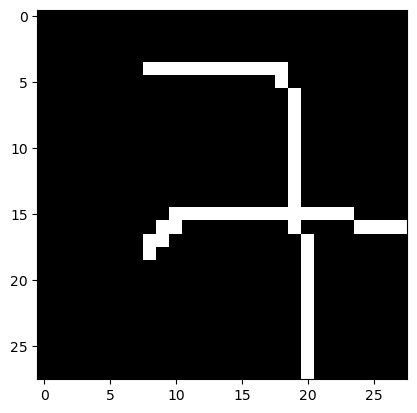

In [55]:
img = cv2.imread("digits/3.png")[:,:, 0]
img = np.array([img])

prediction = model.predict(img)
print(f"this digit is probably {np.argmax(prediction)}, accuracy {prediction}")
# plt.imshow(img[0], cmap = plt.cm.binary)

img = img.reshape(28, 28, 1)
plt.imshow(img, cmap = plt.cm.binary)
plt.show()
